# DropOut Test Case

Podme teda vyskusat, dropout na konkretnom priklade.

In [1]:
import numpy as np

from backstage.utils import dataset_Circles, dataset_Flower, draw_DecisionBoundary, draw_TrainingResults
from backstage.layer import Input, Dense, DropOut
from backstage.loss import CreateLossFunction
from backstage.optimizer import GradientDescent
from backstage.model import Model

## Test Case

Budeme pouzivat Circles dataset, avsak tentokrat aj s vyraznym noise faktorom, ktory znemozni modelu lahko sa naucit riesenie.

In [2]:
def test_DropOutCase(mTrain, mDev, noise, layers, epochs=50000):
    np.random.seed(1)

    # Spravime dataset
    X, Y = dataset_Flower(m=mTrain, noise=noise)
    devX, devY = dataset_Flower(m=mDev, noise=noise)

    # Model
    model = Model(layers)
    model.initialize(loss=CreateLossFunction('bce'), optimizer=GradientDescent(0.03))

    # Ucime
    results = model.train(X, Y, epochs, 0, devX, devY, verboseInterval=5000)

    # Kreslime vysledok
    draw_TrainingResults(results)
    draw_DecisionBoundary(devX, devY, model)

## Poor Fit

Vyskusame si, ze silny noise faktor komplikuje modelu ucenie.

Epoch 0:  Loss = 0.9467746   Val_Loss = 0.8903456
Epoch 5000:  Loss = 0.4194020   Val_Loss = 0.4571163
Epoch 10000:  Loss = 0.4039329   Val_Loss = 0.4625641
Epoch 15000:  Loss = 0.4004700   Val_Loss = 0.4626499
Epoch 20000:  Loss = 0.3982813   Val_Loss = 0.4625225
Epoch 25000:  Loss = 0.3951332   Val_Loss = 0.4607303
Epoch 30000:  Loss = 0.3920991   Val_Loss = 0.4599637
Epoch 35000:  Loss = 0.3897073   Val_Loss = 0.4601099
Epoch 40000:  Loss = 0.3872069   Val_Loss = 0.4599838
Epoch 45000:  Loss = 0.3856678   Val_Loss = 0.4590339
Training complete.
Epoch 49999:  Loss = 0.3830511   Val_Loss = 0.4566836


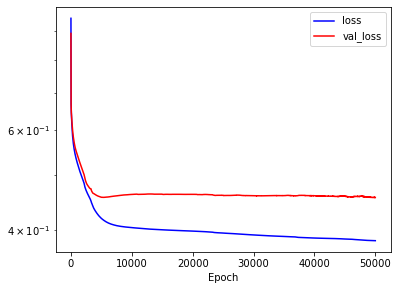

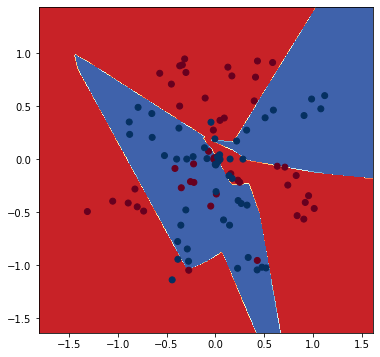

In [3]:
def test_PoorFit():

    layers = [
        Input(2),
        Dense(5, act='relu'),
        Dense(5, act='relu'),
        Dense(1, act='sigmoid')
    ]

    # Train model
    test_DropOutCase(mTrain=500, mDev=100, noise=0.2, layers=layers)

test_PoorFit()

## Model Too Strong !

Vyskusame, ako si so situaciou poradi ovela silnejsia siet.

Epoch 0:  Loss = 1.7920147   Val_Loss = 1.6794476
Epoch 5000:  Loss = 0.2903641   Val_Loss = 0.2718564
Epoch 10000:  Loss = 0.2641945   Val_Loss = 0.2493134
Epoch 15000:  Loss = 0.2463955   Val_Loss = 0.2493567
Epoch 20000:  Loss = 0.2282269   Val_Loss = 0.2510290
Epoch 25000:  Loss = 0.2178352   Val_Loss = 0.2566000
Epoch 30000:  Loss = 0.2104680   Val_Loss = 0.2626628
Epoch 35000:  Loss = 0.2071694   Val_Loss = 0.2712257
Epoch 40000:  Loss = 0.2030105   Val_Loss = 0.2774731
Epoch 45000:  Loss = 0.2007380   Val_Loss = 0.2822793
Training complete.
Epoch 49999:  Loss = 0.2017260   Val_Loss = 0.3382785


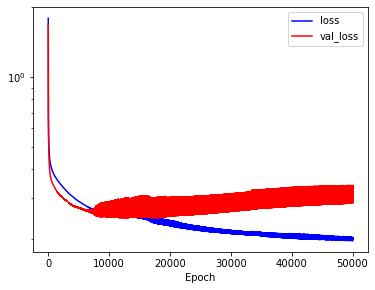

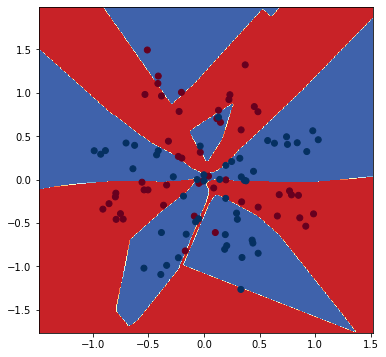

In [16]:
def test_ModelTooStrong():

    layers = [
        Input(2),
        Dense(15, act='relu'),
        Dense(15, act='relu'),
        Dense(1, act='sigmoid')
    ]

    # Train model
    test_DropOutCase(mTrain=400, mDev=100, noise=0.2, layers=layers)

test_ModelTooStrong()

## Model With DropOut !

A skusime teraz pouzit DropOut.

Epoch 0:  Loss = 2.6761395   Val_Loss = 1.7461668
Epoch 5000:  Loss = 0.4054880   Val_Loss = 0.3173296
Epoch 10000:  Loss = 0.3583338   Val_Loss = 0.2754082
Epoch 15000:  Loss = 0.3316941   Val_Loss = 0.2625796
Epoch 20000:  Loss = 0.3194215   Val_Loss = 0.2593841
Epoch 25000:  Loss = 0.2986716   Val_Loss = 0.2522881
Epoch 30000:  Loss = 0.3024790   Val_Loss = 0.2454823
Epoch 35000:  Loss = 0.2792794   Val_Loss = 0.2415195
Epoch 40000:  Loss = 0.2789608   Val_Loss = 0.2438423
Epoch 45000:  Loss = 0.2621204   Val_Loss = 0.2368165
Training complete.
Epoch 49999:  Loss = 0.2596880   Val_Loss = 0.2438373


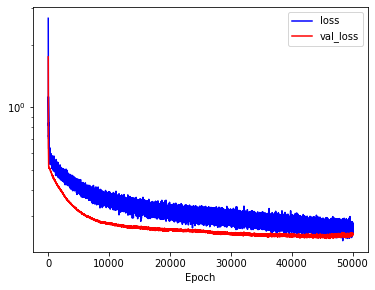

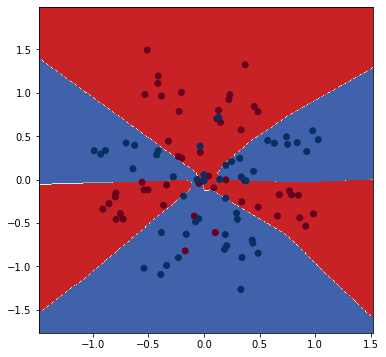

In [17]:
def test_DropOut():

    layers = [
        Input(2),
        Dense(15, act='relu'),
        Dense(15, act='relu'),
        DropOut(0.4),
        Dense(1, act='sigmoid')
    ]

    # Train model
    test_DropOutCase(mTrain=400, mDev=100, noise=0.2, layers=layers)

test_DropOut()